### Import all necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading Data From the Web

In [5]:
# Loading data from the web
# Data was downloaded from https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data?resource=download
bill_url = "https://raw.githubusercontent.com/DSCI-310-2025/dsci-310-group-python2/refs/heads/main/data/BankNote_Authentication.csv"
bill_data = pd.read_csv(bill_url)

### Wrangle and Clean Data

In [18]:
# See if there are missing values
missing_values = bill_data.isna().sum().sum()
print(missing_values)

0


### Summary of Dataset

In [7]:
# Create count table
count_table = bill_data.groupby('class').size().reset_index(name='Count')
count_table['Percentage'] = 100 * count_table['Count'] / len(bill_data)

count_table

,class,Count,Percentage
0,0,762,55.539359
1,1,610,44.460641


#### Table 1. Authentic (0) to Fake (1) Proportion in Dataset

In [8]:
# Split data into training and testing sets
bill_train, bill_test = train_test_split(bill_data, test_size=0.25, stratify=bill_data['class'], random_state=1)
# Take a look at first 5 rows
bill_train.head(5)

,variance,skewness,curtosis,entropy,class
892,0.21431,-0.69529,0.87711,0.29653,1
465,-2.69890,12.19840,0.67661,-8.54820,0
57,5.80700,5.00970,-2.23840,0.43878,0
1166,-2.19790,-2.12520,1.71510,0.45171,1
223,4.64640,10.53260,-4.58520,-4.20600,0


In [9]:
# Create class proportions table
class_proportions_table = bill_train.groupby('class').size().reset_index(name='Count')
class_proportions_table['Percentage'] = 100 * class_proportions_table['Count'] / len(bill_train)

class_proportions_table

# We notice that our "class" proportions were preserved when we split the data

,class,Count,Percentage
0,0,572,55.587949
1,1,457,44.412051


#### Table 2. Mean of Factors

In [10]:
# Compute mean for each factor
means_per_column = bill_train.iloc[:, :-1].mean().reset_index()
means_per_column.columns = ['Factor', 'Mean_Value']

means_per_column

,Factor,Mean_Value
0,variance,0.398695
1,skewness,1.837843
2,curtosis,1.462280
3,entropy,-1.192189


#### Table 3. Maximium of Factors

In [11]:
# Compute max for each factor
max_per_column = bill_train.iloc[:, :-1].max().reset_index()
max_per_column.columns = ['Factor', 'Maximum_Value']

max_per_column

,Factor,Maximum_Value
0,variance,6.8248
1,skewness,12.6247
2,curtosis,17.6772
3,entropy,2.1625


#### Table 4. Minimum of Factors

In [12]:
# Compute min for each factor
min_per_column = bill_train.iloc[:, :-1].min().reset_index()
min_per_column.columns = ['Factor', 'Minimum_Value']

min_per_column

,Factor,Minimum_Value
0,variance,-7.0421
1,skewness,-13.6779
2,curtosis,-5.2861
3,entropy,-8.5482


### Visualizations of the Dataset

### Figure 1. Distribution of Variance Grouped By Authentic or Fake

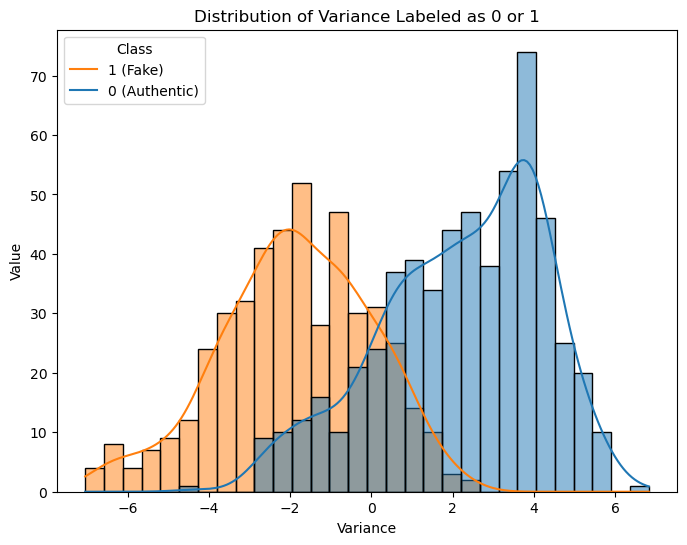

In [13]:
# Plot histogram of variance column distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=bill_train, x='variance', hue='class', element='bars', bins=30, kde=True)
plt.xlabel("Variance")
plt.ylabel("Value")
plt.title("Distribution of Variance Labeled as 0 or 1")
plt.legend(title="Class", labels=["1 (Fake)", "0 (Authentic)"])
plt.show()

### Figure 2. Distribution of Skewness Grouped By Authentic or Fake

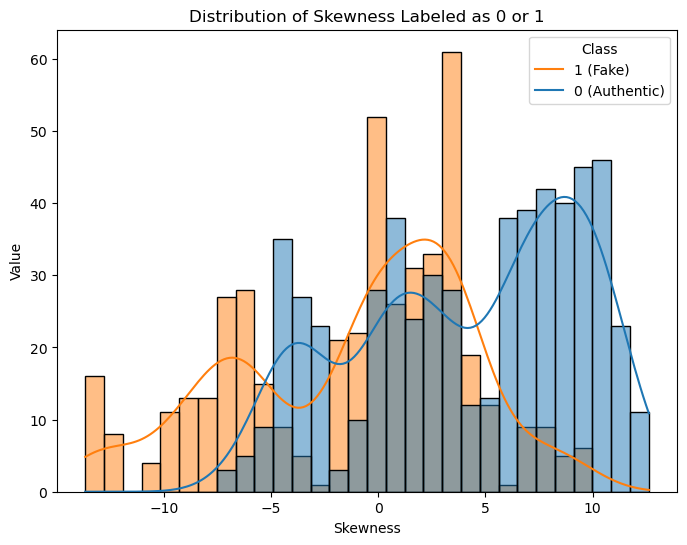

In [14]:
# Plot histogram of skewness column distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=bill_train, x='skewness', hue='class', element='bars', bins=30, kde=True)
plt.xlabel("Skewness")
plt.ylabel("Value")
plt.title("Distribution of Skewness Labeled as 0 or 1")
plt.legend(title="Class", labels=["1 (Fake)", "0 (Authentic)"])
plt.show()

### Figure 3. Distribution of Curtosis Grouped By Authentic or Fake

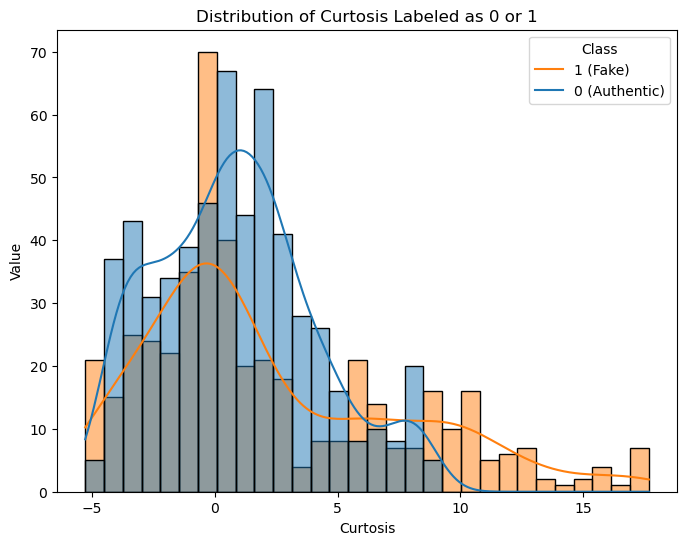

In [15]:
# Plot histogram of curtosis column distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=bill_train, x='curtosis', hue='class', element='bars', bins=30, kde=True)
plt.xlabel("Curtosis")
plt.ylabel("Value")
plt.title("Distribution of Curtosis Labeled as 0 or 1")
plt.legend(title="Class", labels=["1 (Fake)", "0 (Authentic)"])
plt.show()

### Figure 4. Distribution of Entropy Grouped By Authentic or Fake

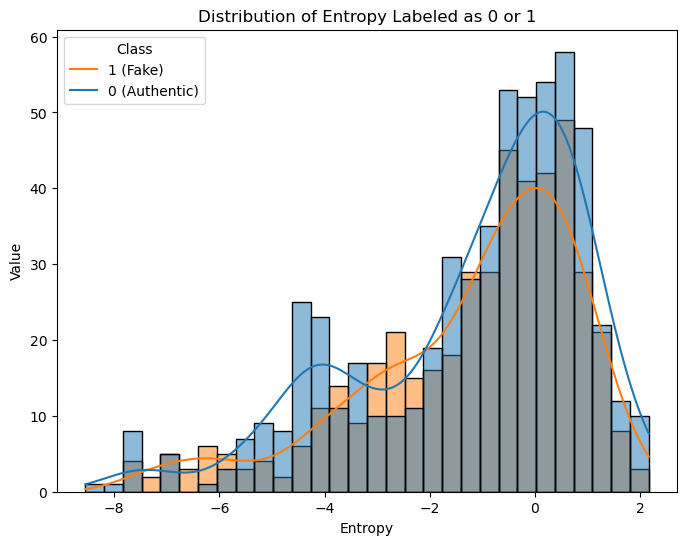

In [16]:
# Plot histogram of entropy column distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=bill_train, x='entropy', hue='class', element='bars', bins=30, kde=True)
plt.xlabel("Entropy")
plt.ylabel("Value")
plt.title("Distribution of Entropy Labeled as 0 or 1")
plt.legend(title="Class", labels=["1 (Fake)", "0 (Authentic)"])
plt.show()

##### Summary of Visualizations

The entropy histograms (Figure 4) have very similar distributions for authentic and fake bills as they both have their modes around 0. Since the distributions are very similar, it is very unlikely that entropy is a driving factor is determining authentic or fake bills. The same can be said for the curtosis histogram (Figure 3) as authentic and fake bills have similar distributions with their modes around 0 as well. Curtosis is also unlikely to be a driving force. The variance distributions (Figure 1) are very different. Both authentic and fake bills have a bell curve distribution with the fake bills having a mode around -2.5 and the authentic bills having a mode around 4. This suggests that variance is a very strong driving force in determining whether a bill is authentic or fake. The skewness histograms (Figure 2) have somewhat different distributions. The fake bills have their mode at around 2.5 while the authentic bills have their mode at around 8. The distributions overlap quite a bit suggesting that skewness is not as big of a driving factor as variance. These histograms will allow us to understand what we should expect with our unknown bill once the bill is identified. We can use these histograms to see if our expectations line up with the unknown bill.

### Data Analysis

### Import all necessary libraries